In [31]:
import numpy as np
import pandas as pd 
import pickle
import json

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report


# 1. Problem statement

Predict the NFL-winner 2023

# 2. DATA GATHERING 

In [32]:
nfl = pd.read_csv("NFL_data.csv")
nfl


,Team,WinLoss perc,PD,Year,FGM,FG_perc,RedZone_perc,playoff_win_perc,Score_perc,Turnover_perc,RushYperG,PassYperG,PointperG,possperG,YallowedperG,PointallowedperG,perc_punt_20,Result
0,New England Patriots,87.5,205,2010,22,88.0,62.7,87.500000,47.0,5.4,123.3,240.4,32.4,0.490000,366.9,19.6,30.6,Loss
1,New York Jets,68.8,63,2010,30,76.9,40.0,68.750000,32.2,10.6,148.4,203.2,22.9,0.543611,291.4,19.0,45.5,Loss
2,Miami Dolphins,43.8,-60,2010,30,73.2,52.9,0.000000,29.7,15.7,102.7,220.4,17.1,0.514722,309.3,20.8,42.5,Loss
3,Buffalo Bills,25.0,-142,2010,16,76.2,51.4,0.000000,25.3,19.2,107.5,197.8,17.7,0.476389,361.6,26.6,22.7,Loss
4,Pittsburgh Steelers,75.0,143,2010,29,78.4,48.0,75.000000,36.9,9.5,120.2,225.0,23.4,0.540000,276.8,14.5,31.6,Loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,Carolina Panthers,29.4,-100,2021,26,89.7,53.2,0.000000,29.2,14.9,108.4,190.5,17.9,0.511944,305.9,23.8,21.1,Loss
380,Los Angeles Rams,70.6,88,2021,32,94.1,60.0,70.588235,45.9,12.2,99.0,273.1,27.1,0.484167,344.9,21.9,47.8,Win
381,Arizona Cardinals,64.7,83,2021,30,81.1,60.0,64.705882,44.7,7.8,122.1,251.5,26.4,0.520833,329.2,21.5,20.1,Loss
382,San Francisco 49ers,58.8,62,2021,27,84.4,66.7,58.823529,41.2,11.5,127.4,248.3,25.1,0.519167,310.0,21.5,38.0,Loss


In [33]:
nfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Team              384 non-null    object 
 1   WinLoss perc      384 non-null    float64
 2   PD                384 non-null    int64  
 3   Year              384 non-null    int64  
 4   FGM               384 non-null    int64  
 5   FG_perc           384 non-null    float64
 6   RedZone_perc      384 non-null    float64
 7   playoff_win_perc  384 non-null    float64
 8   Score_perc        384 non-null    float64
 9   Turnover_perc     384 non-null    float64
 10  RushYperG         384 non-null    float64
 11  PassYperG         384 non-null    float64
 12  PointperG         384 non-null    float64
 13  possperG          384 non-null    float64
 14  YallowedperG      384 non-null    float64
 15  PointallowedperG  384 non-null    float64
 16  perc_punt_20      384 non-null    float64
 1

# 3. EDA

In [34]:
nfl['Team'].value_counts()

New England Patriots     12
New York Jets            12
San Francisco 49ers      12
Los Angeles Rams         12
Seattle Seahawks         12
Carolina Panthers        12
Tampa Bay Buccaneers     12
New Orleans Saints       12
Atlanta Falcons          12
Minnesota Vikings        12
Detroit Lions            12
Green Bay Packers        12
Chicago Bears            12
Washington Commanders    12
Dallas Cowboys           12
New York Giants          12
Philadelphia Eagles      12
Denver Broncos           12
Las Vegas Raiders        12
Los Angeles Chargers     12
Kansas City Chiefs       12
Tennessee Titans         12
Houston Texans           12
Jacksonville Jaguars     12
Indianapolis Colts       12
Cincinnati Bengals       12
Cleveland Browns         12
Baltimore Ravens         12
Pittsburgh Steelers      12
Buffalo Bills            12
Miami Dolphins           12
Arizona Cardinals        12
Name: Team, dtype: int64

In [35]:
nfl['Team'].isna().sum()

0

In [36]:
nfl = pd.get_dummies(nfl , columns=["Team"])

In [37]:
nfl

,WinLoss perc,PD,Year,FGM,FG_perc,RedZone_perc,playoff_win_perc,Score_perc,Turnover_perc,RushYperG,...,Team_New Orleans Saints,Team_New York Giants,Team_New York Jets,Team_Philadelphia Eagles,Team_Pittsburgh Steelers,Team_San Francisco 49ers,Team_Seattle Seahawks,Team_Tampa Bay Buccaneers,Team_Tennessee Titans,Team_Washington Commanders
0,87.5,205,2010,22,88.0,62.7,87.500000,47.0,5.4,123.3,...,0,0,0,0,0,0,0,0,0,0
1,68.8,63,2010,30,76.9,40.0,68.750000,32.2,10.6,148.4,...,0,0,1,0,0,0,0,0,0,0
2,43.8,-60,2010,30,73.2,52.9,0.000000,29.7,15.7,102.7,...,0,0,0,0,0,0,0,0,0,0
3,25.0,-142,2010,16,76.2,51.4,0.000000,25.3,19.2,107.5,...,0,0,0,0,0,0,0,0,0,0
4,75.0,143,2010,29,78.4,48.0,75.000000,36.9,9.5,120.2,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,29.4,-100,2021,26,89.7,53.2,0.000000,29.2,14.9,108.4,...,0,0,0,0,0,0,0,0,0,0
380,70.6,88,2021,32,94.1,60.0,70.588235,45.9,12.2,99.0,...,0,0,0,0,0,0,0,0,0,0
381,64.7,83,2021,30,81.1,60.0,64.705882,44.7,7.8,122.1,...,0,0,0,0,0,0,0,0,0,0
382,58.8,62,2021,27,84.4,66.7,58.823529,41.2,11.5,127.4,...,0,0,0,0,0,1,0,0,0,0


In [38]:
nfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   WinLoss perc                384 non-null    float64
 1   PD                          384 non-null    int64  
 2   Year                        384 non-null    int64  
 3   FGM                         384 non-null    int64  
 4   FG_perc                     384 non-null    float64
 5   RedZone_perc                384 non-null    float64
 6   playoff_win_perc            384 non-null    float64
 7   Score_perc                  384 non-null    float64
 8   Turnover_perc               384 non-null    float64
 9   RushYperG                   384 non-null    float64
 10  PassYperG                   384 non-null    float64
 11  PointperG                   384 non-null    float64
 12  possperG                    384 non-null    float64
 13  YallowedperG                384 non

In [39]:
nfl["Result"].unique()

array(['Loss', 'Win'], dtype=object)

In [40]:
nfl["Result"].value_counts().to_dict()

{'Loss': 372, 'Win': 12}

In [41]:
nfl["Result"].replace({'Loss': 0, 'Win': 1},inplace=True)

In [42]:
nfl["Result"].value_counts()

0    372
1     12
Name: Result, dtype: int64

In [43]:
nfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   WinLoss perc                384 non-null    float64
 1   PD                          384 non-null    int64  
 2   Year                        384 non-null    int64  
 3   FGM                         384 non-null    int64  
 4   FG_perc                     384 non-null    float64
 5   RedZone_perc                384 non-null    float64
 6   playoff_win_perc            384 non-null    float64
 7   Score_perc                  384 non-null    float64
 8   Turnover_perc               384 non-null    float64
 9   RushYperG                   384 non-null    float64
 10  PassYperG                   384 non-null    float64
 11  PointperG                   384 non-null    float64
 12  possperG                    384 non-null    float64
 13  YallowedperG                384 non

# 4. FEATURE ENGG

In [75]:
from sklearn.preprocessing import StandardScaler

##### data preprocessing

In [79]:
# data scaling using standardization
x = nfl.drop("Result",axis = 1)
y = nfl["Result"]

std_scaler = StandardScaler()
array1 = std_scaler.fit_transform(x)   #x_mean , x_std ,as well as data tranform
std_nfl = pd.DataFrame(array1 , columns=x.columns)
std_nfl

,WinLoss perc,PD,Year,FGM,FG_perc,RedZone_perc,playoff_win_perc,Score_perc,Turnover_perc,RushYperG,...,Team_New Orleans Saints,Team_New York Giants,Team_New York Jets,Team_Philadelphia Eagles,Team_Pittsburgh Steelers,Team_San Francisco 49ers,Team_Seattle Seahawks,Team_Tampa Bay Buccaneers,Team_Tennessee Titans,Team_Washington Commanders
0,1.954817,2.036601,-1.593255,-0.728680,0.622775,0.901487,1.783239,1.766476,-2.113990,0.480114,...,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605
1,0.979473,0.625882,-1.593255,0.722069,-0.943312,-1.825310,1.234031,-0.443203,-0.442354,1.696539,...,-0.179605,-0.179605,5.567764,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605
2,-0.324463,-0.596078,-1.593255,0.722069,-1.465341,-0.275720,-0.779731,-0.816460,1.197135,-0.518228,...,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605
3,-1.305022,-1.410719,-1.593255,-1.816742,-1.042074,-0.455905,-0.779731,-1.473392,2.322274,-0.285605,...,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605
4,1.302849,1.420653,-1.593255,0.540725,-0.731678,-0.864324,1.417101,0.258519,-0.795969,0.329878,...,-0.179605,-0.179605,-0.179605,-0.179605,5.567764,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,-1.075529,-0.993464,1.593255,-0.003306,0.862627,-0.239683,-0.779731,-0.891111,0.939960,-0.241988,...,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605
380,1.073356,0.874248,1.593255,1.084756,1.483418,0.577155,1.287875,1.602243,0.071996,-0.697541,...,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605
381,0.765627,0.824575,1.593255,0.722069,-0.350738,0.577155,1.115575,1.423080,-1.342465,0.421958,...,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605
382,0.457899,0.615948,1.593255,0.178038,0.114855,1.381980,0.943274,0.900520,-0.153032,0.678812,...,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,5.567764,-0.179605,-0.179605,-0.179605,-0.179605


# 6. MODEL TRAINING 

###### THE TARGET VARIABLE IS "RESULT" AND THE OUTPUT IS "WIN"/"LOSS" WHICH IS BINARY CLASSIFICATION PROBLEM

In [80]:
x = std_nfl
y = nfl["Result"]

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=29,stratify=y)

In [82]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape 

((307, 48), (77, 48), (307,), (77,))

In [85]:
binc_model = LogisticRegression()
binc_model.fit(x_train,y_train)

LogisticRegression()

In [103]:
#training 
binc_model.predict(x_train)[50:62]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [104]:
binc_model.predict_proba(x_train)[50:62]

array([[4.68248005e-01, 5.31751995e-01],
       [9.99941026e-01, 5.89736762e-05],
       [9.98361991e-01, 1.63800928e-03],
       [9.97425617e-01, 2.57438299e-03],
       [9.20080013e-01, 7.99199865e-02],
       [9.98609080e-01, 1.39092009e-03],
       [9.99938476e-01, 6.15244862e-05],
       [9.98567108e-01, 1.43289229e-03],
       [9.59332895e-01, 4.06671050e-02],
       [9.99914891e-01, 8.51090410e-05],
       [9.88989390e-01, 1.10106097e-02],
       [3.66037930e-01, 6.33962070e-01]])

In [121]:
#testing 
binc_model.predict(x_test)[59:65]

array([1, 0, 0, 0, 0, 0], dtype=int64)

In [124]:
binc_model.predict_proba(x_test)[59:65]

array([[2.17979881e-01, 7.82020119e-01],
       [9.99536479e-01, 4.63520701e-04],
       [9.99964443e-01, 3.55567639e-05],
       [9.96409772e-01, 3.59022778e-03],
       [9.99937668e-01, 6.23322513e-05],
       [9.81804977e-01, 1.81950232e-02]])

In [160]:
from sklearn.metrics import precision_score , recall_score , f1_score ,roc_curve

# MODEL EVALUATION 

In [128]:
### Training  Data Model Evaluation 

def model_eval(model,x,y):
    y_pred = model.predict(x)

    con_mat = confusion_matrix(y,y_pred)
    print(f"Confusion Matrix = \n{con_mat}")

    print("*"*50)
    acc = accuracy_score(y,y_pred)
    print(f"Accuracy Score = {acc}")

    precision_val = precision_score(y,y_pred)
    print(f"Precision Score = {precision_val}")

    recall_val = recall_score(y,y_pred)
    print(f"Recall Score = {recall_val}")

    f1_val = f1_score(y,y_pred)
    print(f"f1-score = {f1_val}")
    print("*"*50)
    clf_report = classification_report(y,y_pred)
    print(f"Classification Report = \n{clf_report}")
    
    return "Model Performance"


In [129]:
# Training data
model_eval(binc_model,x_train,y_train)

Confusion Matrix = 
[[296   1]
 [  5   5]]
**************************************************
Accuracy Score = 0.9804560260586319
Precision Score = 0.8333333333333334
Recall Score = 0.5
f1-score = 0.625
**************************************************
Classification Report = 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       297
           1       0.83      0.50      0.62        10

    accuracy                           0.98       307
   macro avg       0.91      0.75      0.81       307
weighted avg       0.98      0.98      0.98       307



'Model Performance'

In [131]:
# Testing data
model_eval(binc_model,x_test,y_test)

Confusion Matrix = 
[[74  1]
 [ 2  0]]
**************************************************
Accuracy Score = 0.961038961038961
Precision Score = 0.0
Recall Score = 0.0
f1-score = 0.0
**************************************************
Classification Report = 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       0.00      0.00      0.00         2

    accuracy                           0.96        77
   macro avg       0.49      0.49      0.49        77
weighted avg       0.95      0.96      0.95        77



'Model Performance'

# BAIS VARIANCE & TRADEOFF

In [159]:
# MODEL ACCEPTANCE = 95%
# TRAINING = Accuracy Score = 0.9804560260586319
# TESTING  = Accuracy Score = 0.961038961038961

BIAS = "low bias"
VARIANCE = "low variance" 

print("\U0001F499","BEST FIT MODEL","\U0001F499")

💙 BEST FIT MODEL 💙


# ROC_CURVE

In [163]:
y_test_prob = binc_model.predict_proba(x_test)
y_test_prob[0:5]

array([[9.98291376e-01, 1.70862414e-03],
       [9.99971251e-01, 2.87493590e-05],
       [9.99809874e-01, 1.90126214e-04],
       [9.99953663e-01, 4.63370658e-05],
       [9.97175351e-01, 2.82464942e-03]])

In [169]:
class_1 = y_test_prob[:,1]
class_1

array([1.70862414e-03, 2.87493590e-05, 1.90126214e-04, 4.63370658e-05,
       2.82464942e-03, 1.87664718e-04, 1.79942860e-03, 1.83648998e-04,
       2.15580951e-02, 2.73808005e-03, 2.88308399e-04, 2.82009571e-05,
       1.84058072e-02, 3.23755389e-01, 1.15943554e-01, 3.16473514e-03,
       2.69339312e-03, 7.78643382e-05, 1.53113031e-04, 2.20520256e-05,
       1.46619964e-03, 5.01061207e-05, 1.88420130e-04, 1.77936240e-03,
       1.73007818e-02, 2.32416115e-02, 5.03521372e-02, 2.82772280e-03,
       2.30796111e-04, 2.55936224e-04, 5.76207729e-03, 2.34971911e-05,
       2.43552401e-03, 3.99292869e-03, 3.65115874e-04, 7.89389211e-02,
       1.62536723e-02, 1.25226459e-04, 2.28914818e-05, 2.04371443e-03,
       7.72746911e-05, 5.52664293e-02, 7.37079434e-05, 7.24370373e-02,
       1.87764841e-04, 1.70604456e-02, 2.61524665e-02, 4.53734488e-03,
       4.06841818e-03, 9.39548382e-04, 1.30190665e-03, 2.85533622e-04,
       3.16788400e-04, 1.03737644e-04, 2.03546838e-03, 3.64929029e-03,
      

In [188]:
fpr, tpr, thesh = roc_curve(y_test,class_1)

In [189]:
fpr

array([0.        , 0.01333333, 0.10666667, 0.10666667, 0.2       ,
       0.2       , 1.        ])

In [190]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'ROC Curve Testing')

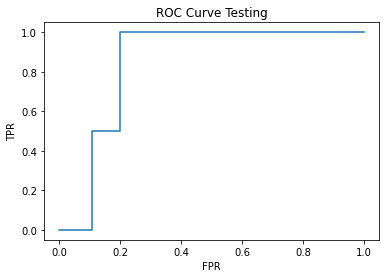

In [208]:
y_test_prob = binc_model.predict_proba(x_test)
class_1 = y_test_prob[:,1]
class_1
fpr, tpr, thesh = roc_curve(y_test,class_1)

plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve Testing")

Text(0.5, 1.0, 'ROC Curve Training')

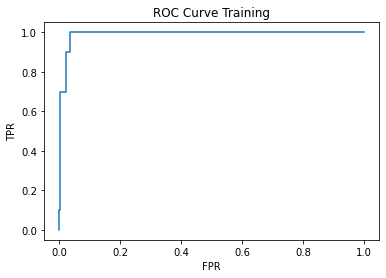

In [209]:
y_train_prob = binc_model.predict_proba(x_train)
class1_prob1 = y_train_prob[:,1]
class1_prob1
fpr1, tpr1, thesh1 = roc_curve(y_train,class1_prob1)

plt.plot(fpr1,tpr1)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve Training")

In [210]:
thesh1

array([1.65450717e+00, 6.54507165e-01, 6.33962070e-01, 3.98351546e-01,
       2.84313918e-01, 2.59817554e-01, 2.35731873e-01, 1.51508186e-01,
       2.79564872e-06])

Text(0.5, 1.0, 'ROC Curve Training')

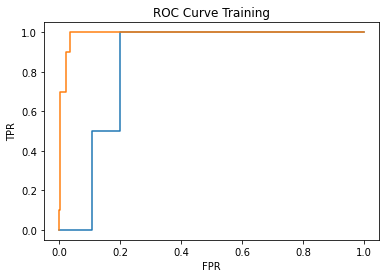

In [213]:
#Testing
plt.plot(fpr,tpr)

#training 
plt.plot(fpr1,tpr1)

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve Training")

# USER TEST FUNCTION

In [226]:
with open("binary_clas_model.pkl","wb") as m_file:
    pickle.dump(binc_model,m_file)

In [228]:
data = x

price = binc_model.predict(data)
print(price)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [231]:
data = x.tail(1)
data

,WinLoss perc,PD,Year,FGM,FG_perc,RedZone_perc,playoff_win_perc,Score_perc,Turnover_perc,RushYperG,...,Team_New Orleans Saints,Team_New York Giants,Team_New York Jets,Team_Philadelphia Eagles,Team_Pittsburgh Steelers,Team_San Francisco 49ers,Team_Seattle Seahawks,Team_Tampa Bay Buccaneers,Team_Tennessee Titans,Team_Washington Commanders
383,-0.460072,0.288105,1.593255,-1.635399,-1.366579,1.129722,-0.779731,-0.055016,-1.59964,0.417111,...,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,-0.179605,5.567764,-0.179605,-0.179605,-0.179605


In [234]:
result = binc_model.predict(data)
result

array([0], dtype=int64)

# json

In [236]:
print (x.columns.tolist())

['WinLoss perc', 'PD', 'Year', 'FGM', 'FG_perc', 'RedZone_perc', 'playoff_win_perc', 'Score_perc', 'Turnover_perc', 'RushYperG', 'PassYperG', 'PointperG', 'possperG', 'YallowedperG', 'PointallowedperG', 'perc_punt_20', 'Team_Arizona Cardinals', 'Team_Atlanta Falcons', 'Team_Baltimore Ravens', 'Team_Buffalo Bills', 'Team_Carolina Panthers', 'Team_Chicago Bears', 'Team_Cincinnati Bengals', 'Team_Cleveland Browns', 'Team_Dallas Cowboys', 'Team_Denver Broncos', 'Team_Detroit Lions', 'Team_Green Bay Packers', 'Team_Houston Texans', 'Team_Indianapolis Colts', 'Team_Jacksonville Jaguars', 'Team_Kansas City Chiefs', 'Team_Las Vegas Raiders', 'Team_Los Angeles Chargers', 'Team_Los Angeles Rams', 'Team_Miami Dolphins', 'Team_Minnesota Vikings', 'Team_New England Patriots', 'Team_New Orleans Saints', 'Team_New York Giants', 'Team_New York Jets', 'Team_Philadelphia Eagles', 'Team_Pittsburgh Steelers', 'Team_San Francisco 49ers', 'Team_Seattle Seahawks', 'Team_Tampa Bay Buccaneers', 'Team_Tennessee

In [238]:
input_values = {"input_features":x.columns.tolist()}

with open('Input_Features.json','w') as in_file: 
    json.dump(input_values,in_file)